In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :]  # 꽃받침 길이와 꽃받침 폭만 선택

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca1 = PCA(n_components=1)

In [7]:
X_low = pca1.fit_transform(X)

In [8]:
X_low

array([[ 0.28600351],
       [-0.20593593],
       [-0.21267237],
       [-0.31826466],
       [ 0.29085585],
       [ 0.84524522],
       [-0.10829984],
       [ 0.16397009],
       [-0.61165489],
       [-0.12924697]])

In [9]:
X2 = pca1.inverse_transform(X_low)

In [10]:
X2

array([[5.0510821 , 3.51495998, 1.4970222 , 0.25264906],
       [4.72241193, 3.16241921, 1.41614181, 0.19649115],
       [4.71791125, 3.15759165, 1.41503426, 0.19572214],
       [4.64736387, 3.08192057, 1.3976737 , 0.18366814],
       [5.054324  , 3.51843733, 1.49781998, 0.25320298],
       [5.42471764, 3.91573186, 1.58896784, 0.31648993],
       [4.78764369, 3.2323886 , 1.43219429, 0.20763691],
       [4.96955022, 3.42750662, 1.47695853, 0.23871819],
       [4.45134663, 2.87166702, 1.34943704, 0.15017584],
       [4.77364867, 3.21737716, 1.42875034, 0.20524567]])

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [12]:
from sklearn.datasets import fetch_olivetti_faces

In [13]:
faces_all = fetch_olivetti_faces()

In [39]:
K = 30  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

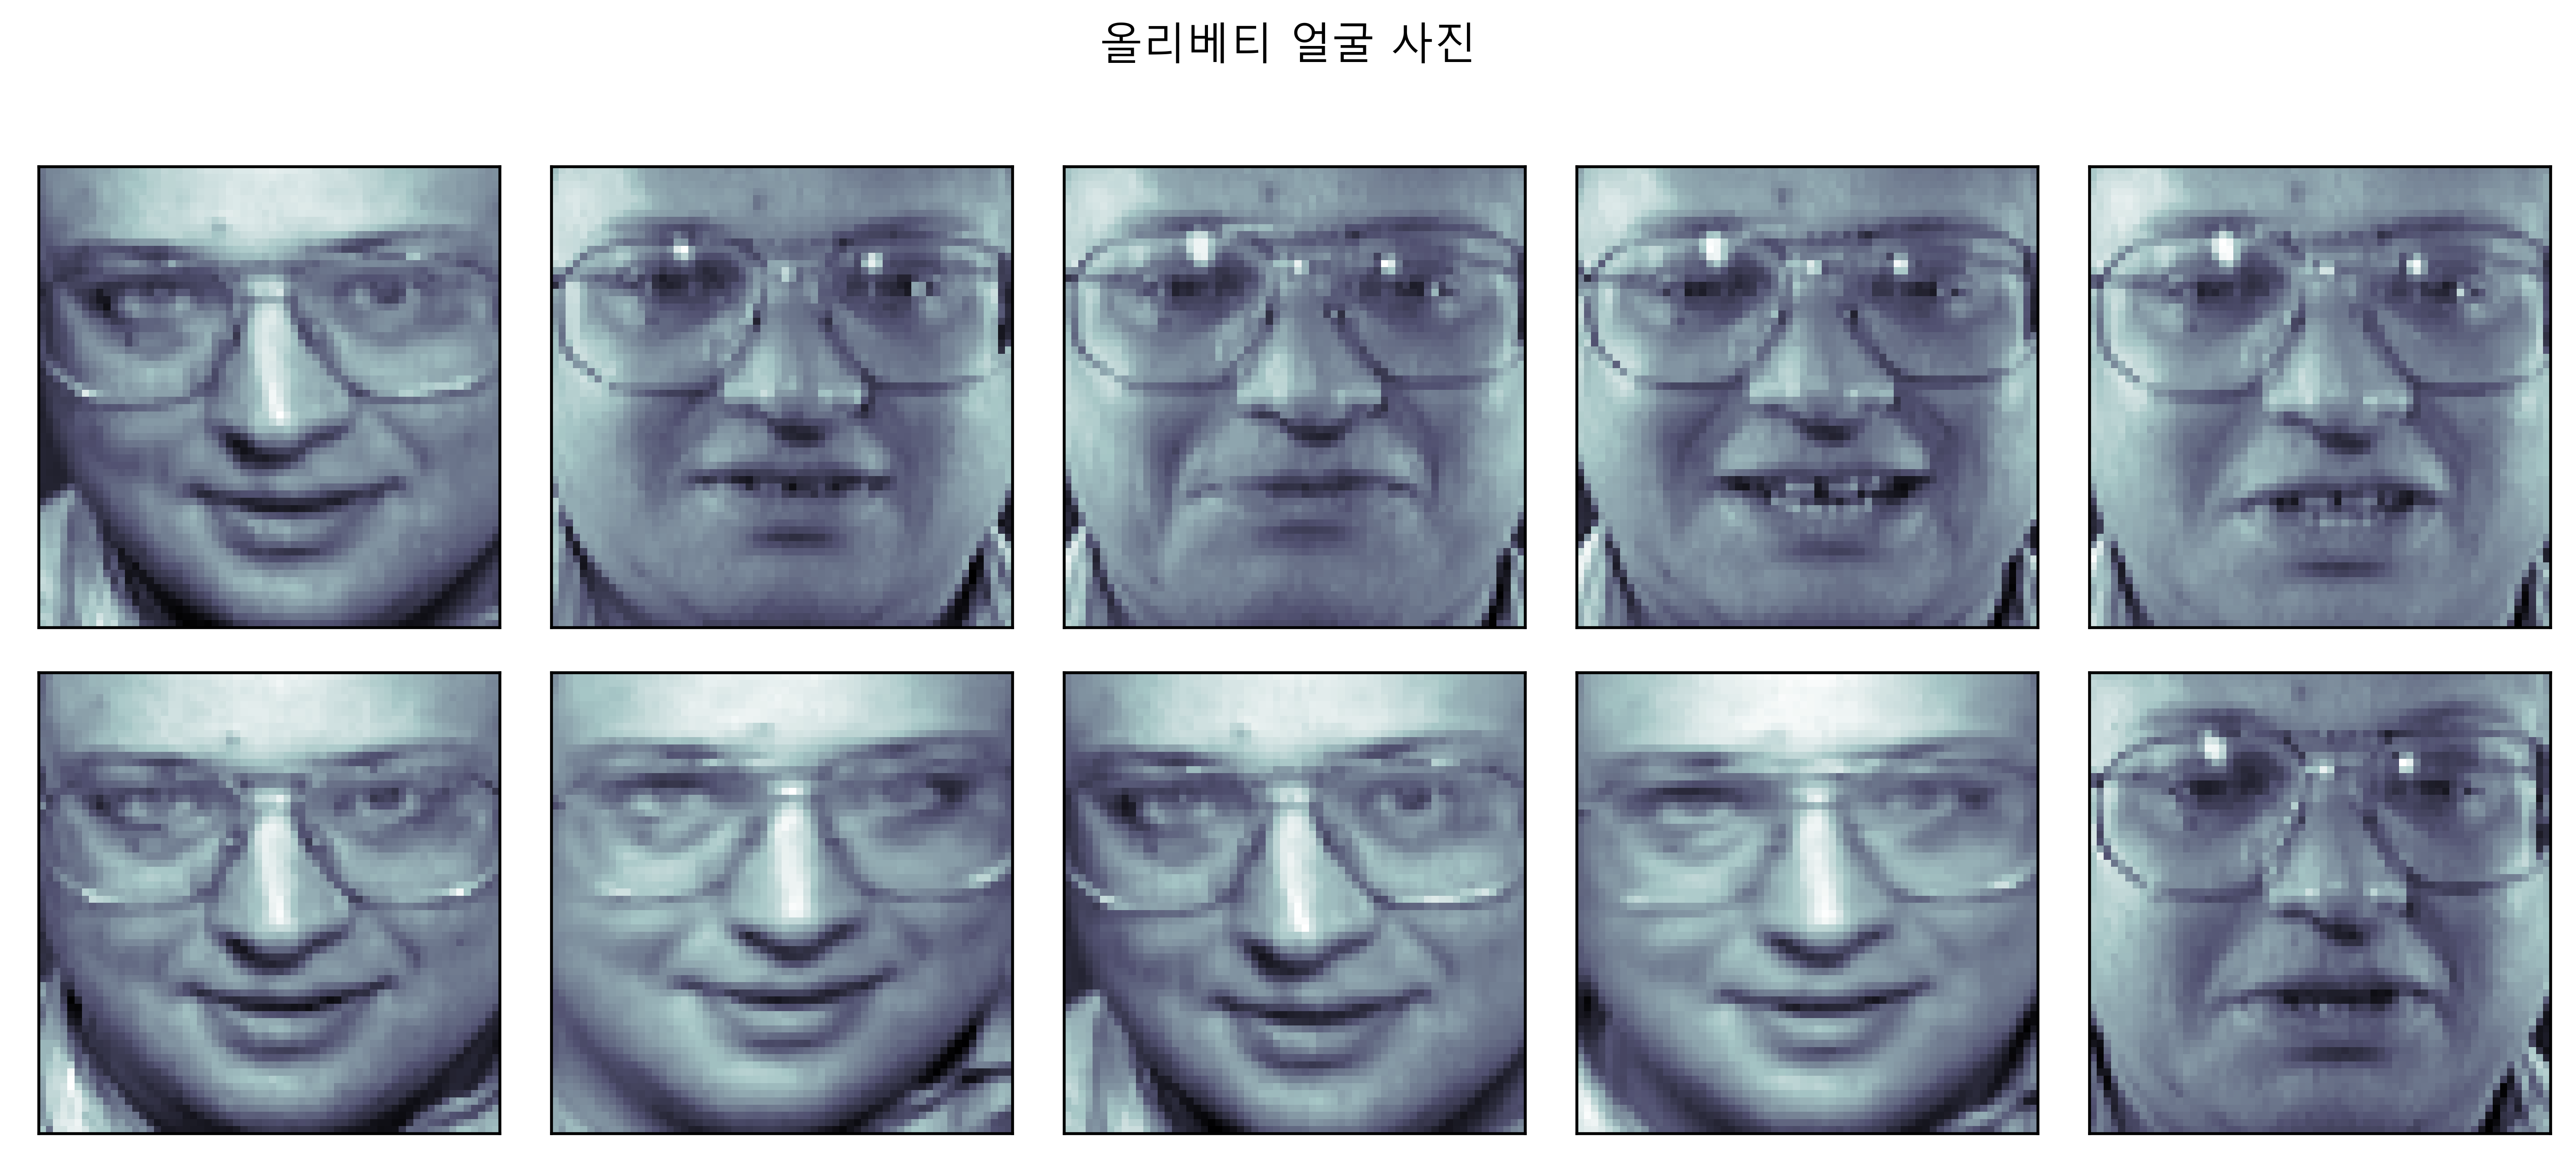

In [41]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

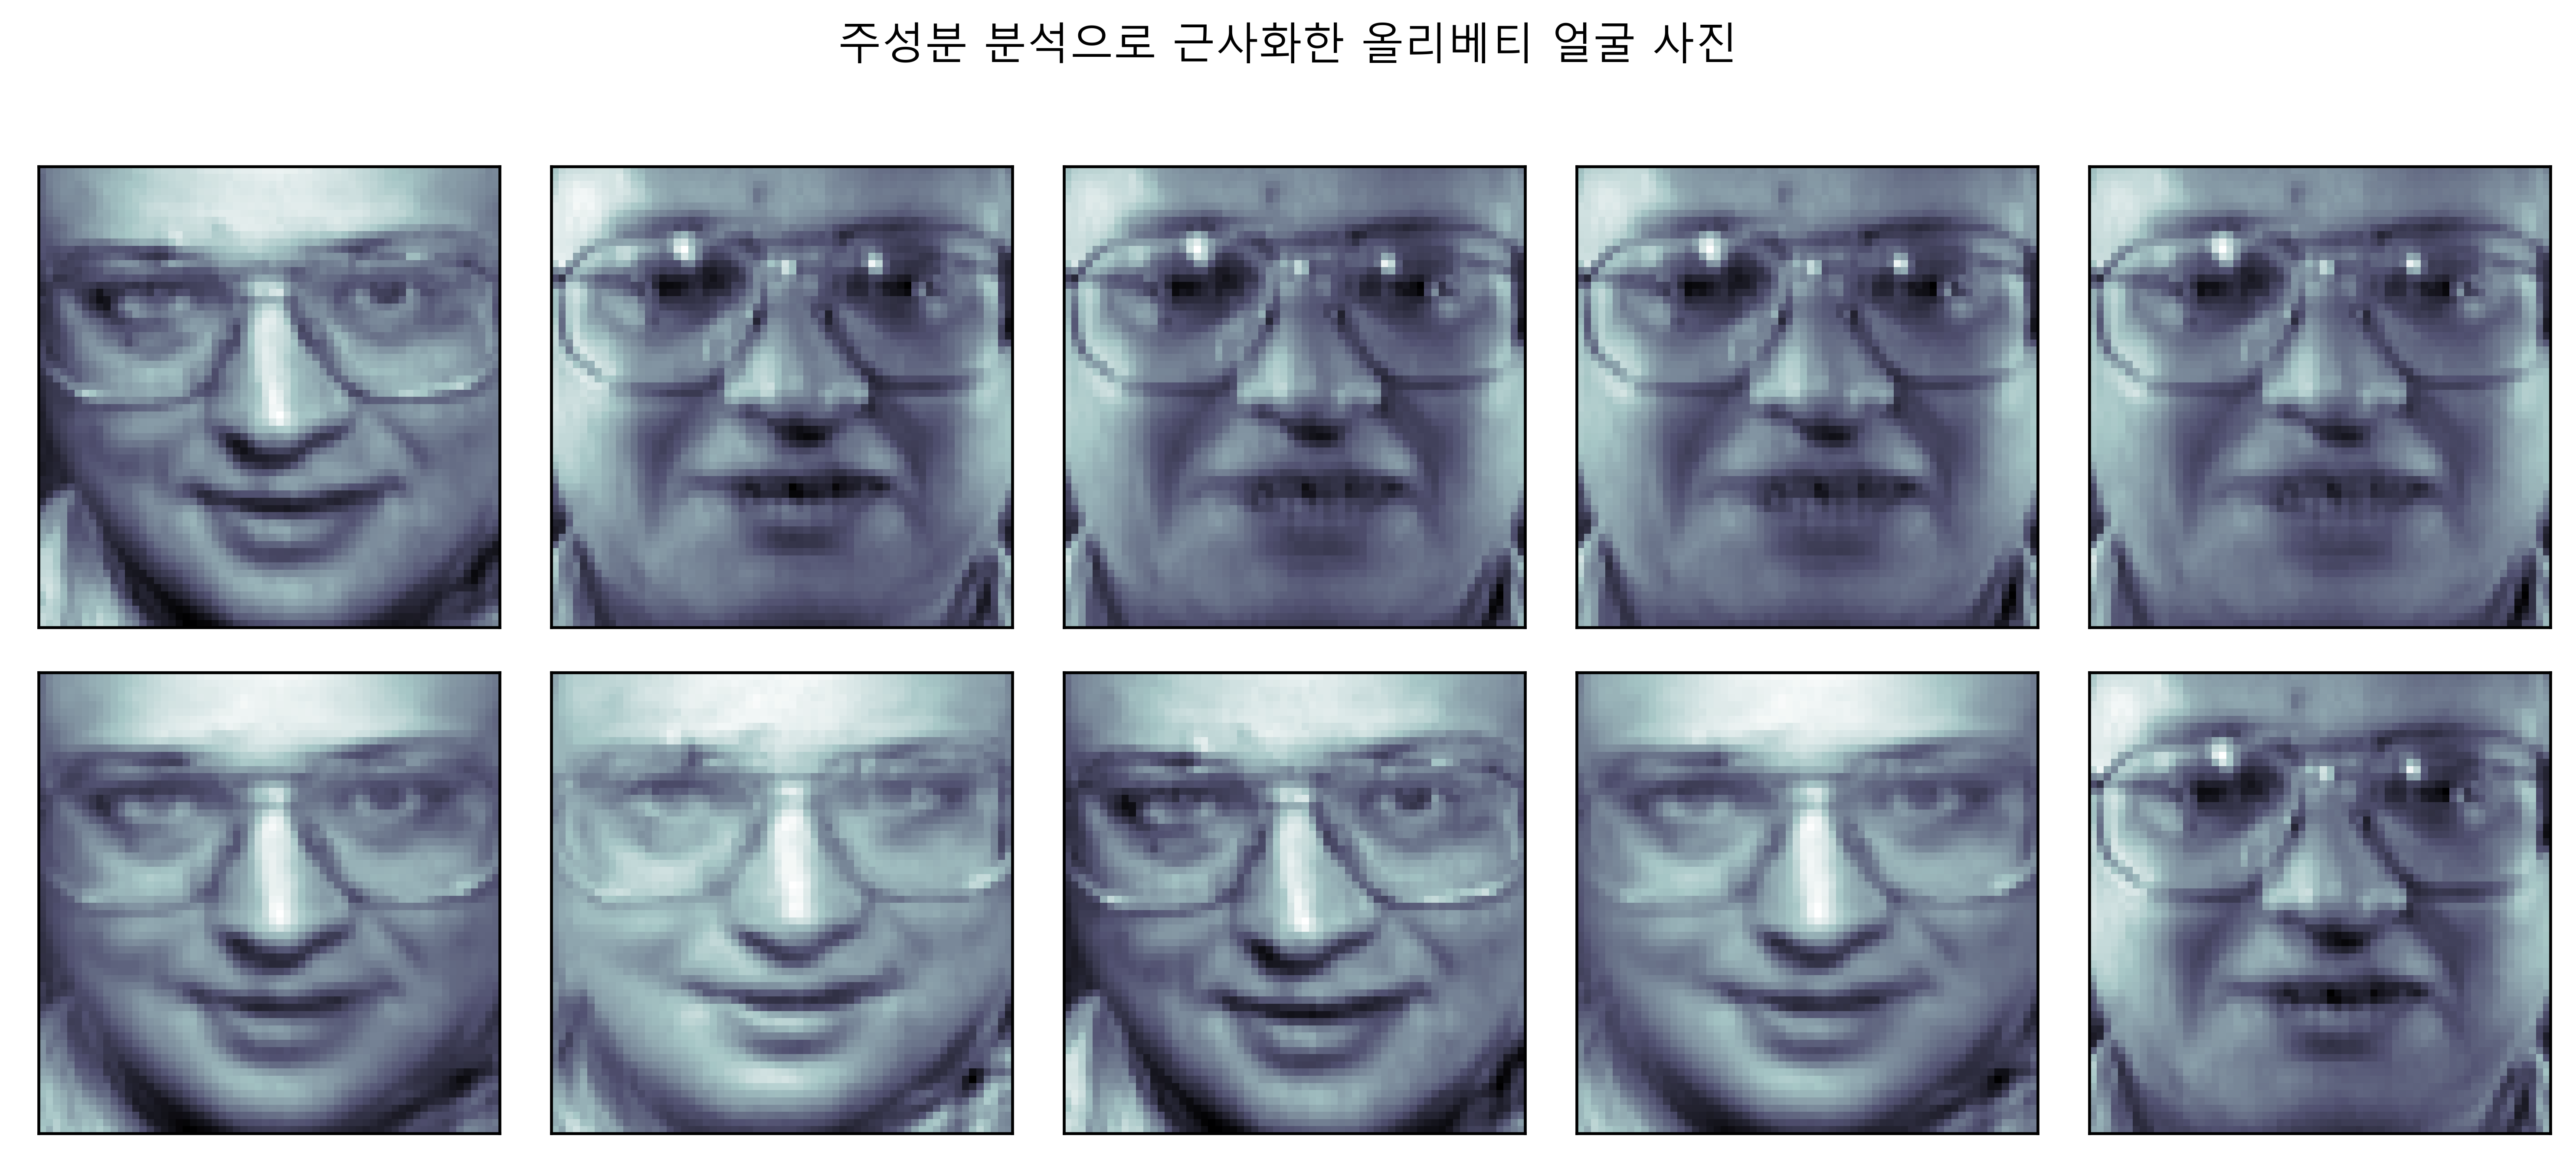

In [17]:
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

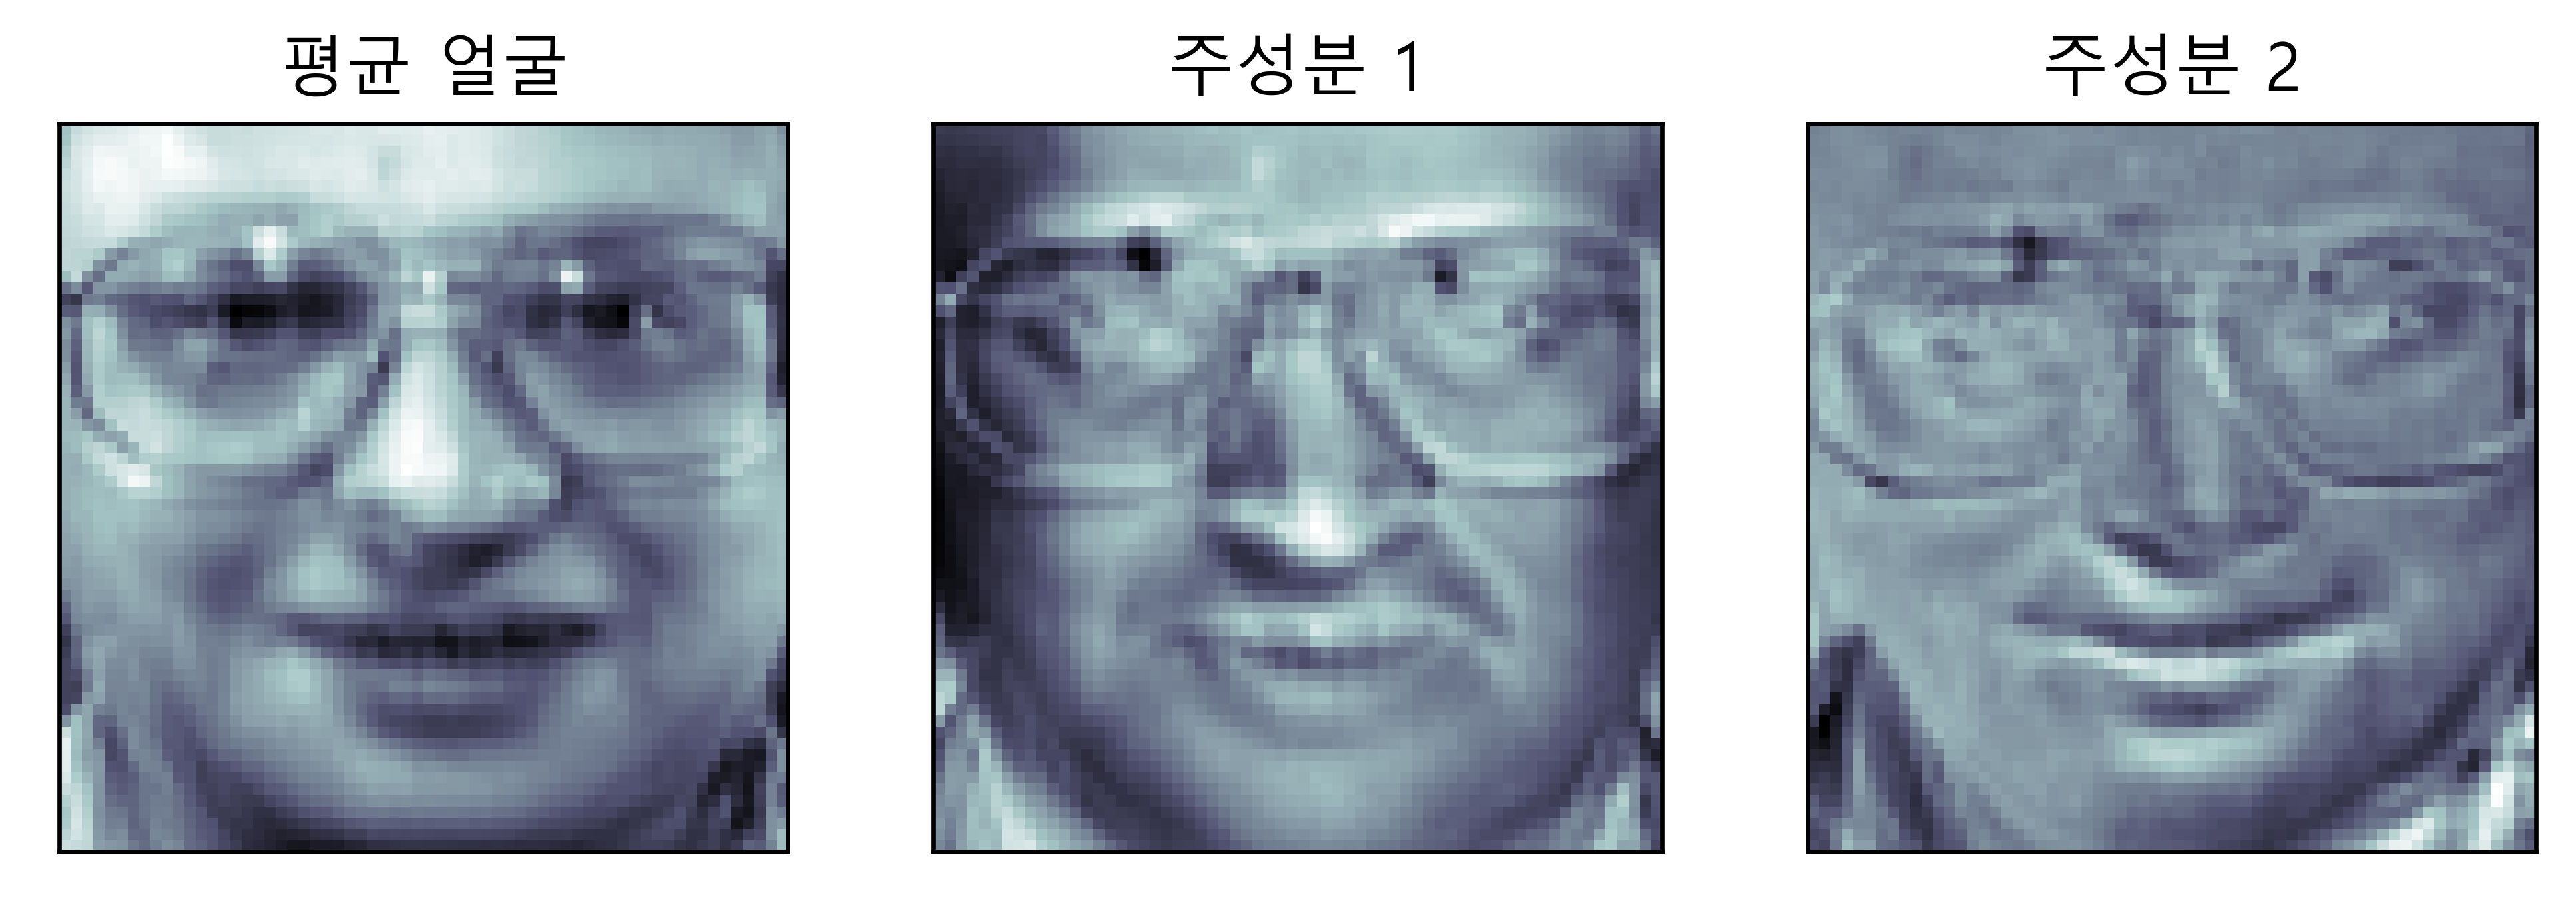

In [18]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

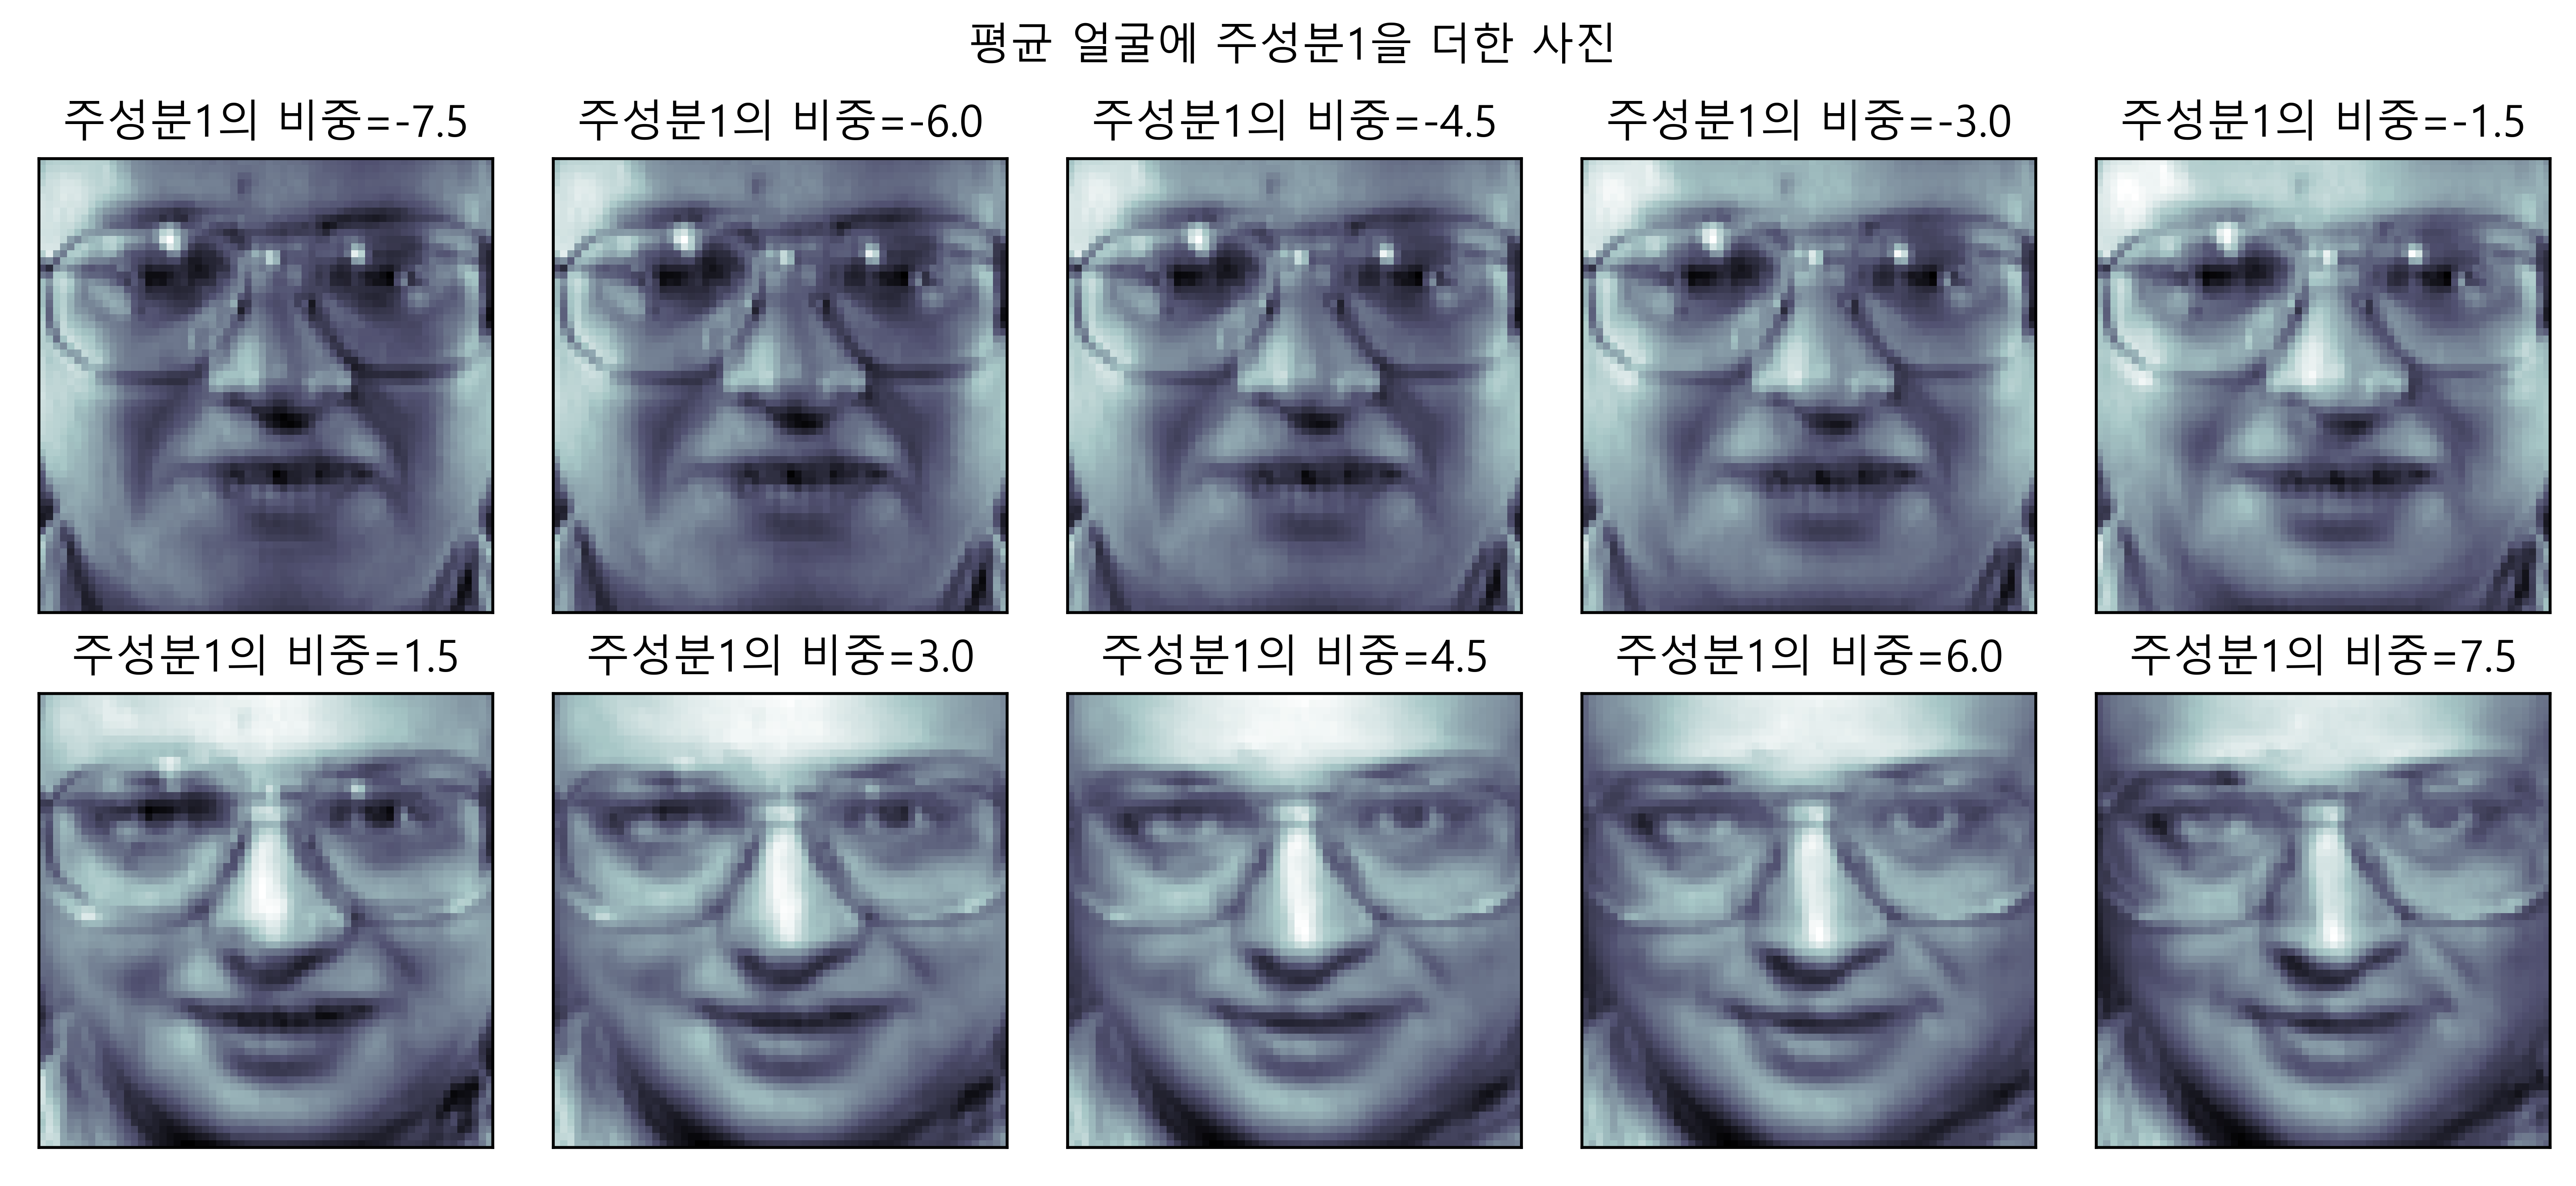

In [19]:
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()